# Análisis con la tabla y complementación con SIMBAD

#### Importo las librerias necesarias

In [277]:
import os
import pandas as pd
from astroquery.simbad import Simbad
import matplotlib.pyplot as plt
from datetime import date as get_time

In [278]:
os.chdir("/home/federico/andrea/Resources/")

## Objetos unicos

#### Lectura de la tabla

In [279]:
df = pd.read_csv("/home/federico/andrea/Resources/tablas/tabla1.csv")
df

,FNAME,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,BSCALE,BZERO,OBSERVAT,DATE-OBS,...,TELESCOP,DETECTOR,GAIN,RDNOISE,IMAGETYP,OBJECT,PROG-ID,OBSERVER,INSTRUME,COMMENT
0,ffl9.fit,True,16,2,1024,1034,1.0,32768.0,CASLEO,2017-12-05,...,2.15m,TK 1K,1.98,7.4,flat,flat lampara,NaN,R. Iba?ez para A. Buccino (remoto),REOSC (DC) - Red # 180 - 316 l/mm - Ang. 5? 40',= 'Decker 8 - Ranura 250 u '
1,bias2.fit,True,16,2,1024,1034,1.0,32768.0,CASLEO,2017-12-05,...,2.15m,TK 1K,1.98,7.4,zero,NaN,NaN,R. Iba?ez para A. Buccino (remoto),REOSC (DC) - Red # 180 - 316 l/mm - Ang. 5? 40',= 'Decker 8 - Ranura 250 u '
2,h42581b.fit,True,16,2,1024,1034,1.0,32768.0,CASLEO,2017-12-06,...,2.15m,TK 1K,1.98,7.4,object,HD42581,NaN,R. Iba?ez para A. Buccino (remoto),REOSC (DC) - Red # 180 - 316 l/mm - Ang. 5? 40',= 'Decker 8 - Ranura 250 u '
3,ffl4.fit,True,16,2,1024,1034,1.0,32768.0,CASLEO,2017-12-05,...,2.15m,TK 1K,1.98,7.4,flat,flat lampara,NaN,R. Iba?ez para A. Buccino (remoto),REOSC (DC) - Red # 180 - 316 l/mm - Ang. 5? 40',= 'Decker 8 - Ranura 250 u '
4,bias3.fit,True,16,2,1024,1034,1.0,32768.0,CASLEO,2017-12-05,...,2.15m,TK 1K,1.98,7.4,zero,NaN,NaN,R. Iba?ez para A. Buccino (remoto),REOSC (DC) - Red # 180 - 316 l/mm - Ang. 5? 40',= 'Decker 8 - Ranura 250 u '
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240,bias9.fit,True,16,2,1024,1034,NaN,NaN,CASLEO,2005-08-16,...,2.15m,TK 1K,1.98,7.4,zero,NaN,NaN,Mauas,Reosc DC,= 'red: 316 l/mm Decker 8 '\n= '?ng.: 5 20 ...
20241,h158614b.fit,True,16,2,1024,1034,NaN,NaN,CASLEO,2005-08-17,...,2.15m,TK 1K,1.98,7.4,object,hd 158614,NaN,Mauas,Reosc DC,= 'red: 316 l/mm Decker 8 '\n= '?ng.: 5 20 ...
20242,h147513a.fit,True,16,2,1024,1034,NaN,NaN,CASLEO,2005-08-17,...,2.15m,TK 1K,1.98,7.4,object,hd 147513,NaN,Mauas,Reosc DC,= 'red: 316 l/mm Decker 8 '\n= '?ng.: 5 20 ...
20243,h52265b.fit,True,16,2,1024,1034,NaN,NaN,CASLEO,2005-08-17,...,2.15m,TK 1K,1.98,7.4,object,hd 52265,NaN,Mauas,Reosc DC,= 'red: 316 l/mm Decker 8 '\n= '?ng.: 5 20 ...


#### Cada fila de la tabla se corresponde con una observacion de un objeto en particular. En la columna *"OBJECT"* se encuentra la identificación de cada uno de los objetos observados. Hay desde estrellas hasta lamparas de calibración, o incluso objetos vacíos nombrados como *NaN*. También es importante notar que algunos nombres están escritos con algunas mayúsculas o espacios, mientras que otros no. De querer obtener por ejemplo una lista sin repeticiones de las estrellas observadas, hay que dar cuenta de estas cosas para filtrar las 20245 observaciones.

In [280]:
objects = list(set([x.lower().replace(" ", "") for x in df['OBJECT'].tolist() if type(x) == str])) #Lista sin repeticiones de todos los objetos en la tabla salvo los NaN eliminando los espacios entre caractéres
pre_stars = [x for x in objects if x[0] == 'h' or x[0] == 'g'] #Lista provisoria de estrellas sin repeticiones (aun hay algunas repeticiones)
print('Numero sobreestimado de estrellas distintas:',len(pre_stars))

Numero sobreestimado de estrellas distintas: 324


In [281]:
[x for x in objects if x[0] == 'g' and x[:2] != 'gl'] #Hay tan solo 4 estrellas catalogadas con gj

['gj551', 'gj163', 'gj628', 'gj489']

#### En esta base de datos en particular sucedio que se le agregaba una *a* o una *b* al final del nombre tipeado en el header correspondiendose con la primera y segunda observacion del mismo objeto en un mismo turno. Además, en ocaciones se tipeaba *h* en lugar de *hd*.

In [282]:
# Cambio los h por hd y saco las a y b al final de los nombres
for i in range(len(pre_stars)):
    name = pre_stars[i]
    if name[0] == 'h' and name[1].isnumeric():
        pre_stars[i] = 'hd'+name[1:]
    while pre_stars[i][-1].isnumeric() == False: 
        pre_stars[i] = pre_stars[i][:len(pre_stars[i])-1]
        
stars = list(set(pre_stars)) #Lista de estrellas sin repeticiones
print('Numero de estrellas distintas:',len(stars))

Numero de estrellas distintas: 297


#### Averiguamos que en las 20245 observaciones en la base de datos, hay 293 estrellas distintas. Veremos luego que algunos nombres de estas estrellas estan mal escritos, por lo que podrían ser menos.

## SIMBAD

#### Con el módulo astroquery es fácil acceder a la base de datos astronómica SIMBAD. Por default, el módulo tiene ciertos campos de busqueda.

In [122]:
Simbad.get_votable_fields() #Numera los campos que por el momento estan siendo buscados

['main_id',
 'coordinates',
 'id(opt)',
 'ids',
 'sptype',
 'otype',
 'ra_prec',
 'dec_prec',
 'rot',
 'fe_h',
 'typed_id',
 'id(opt)',
 'ids',
 'sptype',
 'otype',
 'ra_prec',
 'dec_prec',
 'rot',
 'fe_h',
 'typed_id']

#### Con **Simbad.list_votable_fields()** podemos ver todos los campos que pueden ser buscados y con **Simbad.add_votable_fields(*field*)** podemos elegir que campo agregar. Si queremos obtener información sobre una lista de objetos, usamos el comando **Simbad.query_objects(*list*)**, que devuelve una tabla de astropy.

In [123]:
rt = Simbad.query_objects(stars) #Busco información sobre las estrellas observadas

/home/federico/miniconda3/envs/andrea/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 37 raised an error (recorded in the `errors` attribute of the result table): 'hr86334' this identifier has an incorrect format for catalog: 	hr : Harvard Revised photometry  
  warnings.warn("Warning: The script line number %i raised "
/home/federico/miniconda3/envs/andrea/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 140 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : HD 404808 
  warnings.warn("Warning: The script line number %i raised "
/home/federico/miniconda3/envs/andrea/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 158 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : HR  9468 
  warnings.warn("Wa

#### Vemos que surgen varias advertencias. Esto se debe a que varios nombres de estrellas estan mal escritos en los headers de la base de datos, por lo que al buscar estos nombres en SIMBAD emergen estas excepciones. Si quisieramos ver por ejemplo cuantas estrellas de tipo *'F','G','M'* o *'K'* se observaron, se puede hacer lo siguiente:

Estrellas sin errores de tipeo en su nombre: 290

Cantidad de estrellas por tipo:
B: 13
O: 2
k: 1
F: 34
A: 10
G: 103
M: 33
d: 3
K: 91



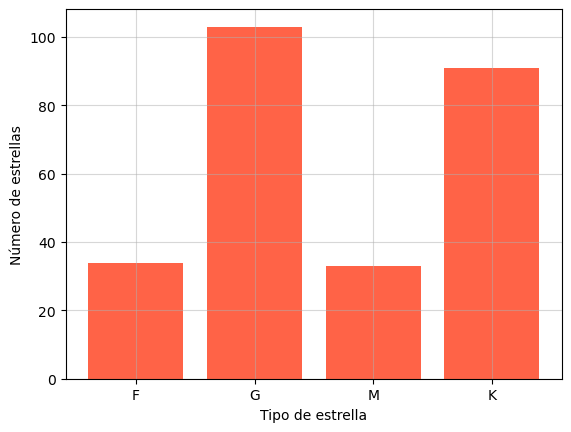

In [273]:
stypes = [x[0] for x in rt['SP_TYPE'].tolist() if x != ''] #Se asume que si el "SP_TYPE" esta vacío entonces el nombre de la estrella estaba mal tipeado, por lo que se descartan estos casos
keys = list(set(stypes)) #Todos lo tipos de estrella que aparecen
counts = [stypes.count(key) for key in keys]
my_keys = ['F','G','M','K'] #Los tipos de estrella que me interesan
my_counts = [stypes.count(key) for key in my_keys] #Conteo de estrellas de cada tipo

print("Estrellas sin errores de tipeo en su nombre:",len(stypes))
print()
print("Cantidad de estrellas por tipo:")
for key,count in zip(keys,counts):
    print(f"{key}: {count}")
print()

#Grafico
plt.bar(my_keys,my_counts,color = 'tomato')
plt.xlabel("Tipo de estrella")
plt.ylabel("Número de estrellas")
plt.grid(alpha = 0.5)
plt.savefig("Types.png", transparent = True)

## Lapsos de observación

In [236]:
table_objects = [x.lower().replace(" ", "") if type(x) == str else x for x in df['OBJECT'].tolist()] #Lista de objetos tal como esta en la tabla
table_dates = df['DATE-OBS'].tolist() #Lista de fechas tal como esta en la tabla

In [237]:
objects = []
dates = []

for obj,date in zip(table_objects,table_dates):
    if type(obj) != str or type(date) != str: #Filtro los nan (hay uno en dates tambien)
        continue
    else:
        if obj[0] == 'h' or obj[0] == 'g': #Me quedo solo con los que empiezan con h o g
            objects.append(obj) 
            dates.append(date)

In [264]:
# Cambio los h por hd y saco las a y b al final de los nombres
for i in range(len(objects)):
    name = objects[i]
    if name[0] == 'h' and name[1].isnumeric():
        objects[i] = 'hd'+name[1:]
    while objects[i][-1].isnumeric() == False: 
        objects[i] = objects[i][:len(objects[i])-1]
        
uniques = list(set(objects))

print('Numero de estrellas:',len(objects))
print(f'Numero de estrellas unicas: {len(uniques)} Coincide con la lista del analisis anterior ✓')

Numero de estrellas: 10133
Numero de estrellas unicas: 297 Coincide con la lista del analisis anterior ✓


In [265]:
#Transformo las fechas a formato datetime
integers = [ (int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2])) for x in dates]
times = [get_time(x[0],x[1],x[2]) for x in integers]

In [266]:
timespans = []
for unique in uniques:
    unidates = [time for obj,time in zip(objects,times) if obj == unique] #tiempos en los que se observo un objeto
    maxi = max(unidates) #tiempo maximo
    mini = min(unidates) #tiempo minimo
    dif = maxi-mini #diferencia de tiempo
    timespans.append(dif.days/365.25) #paso la diferencia a anios

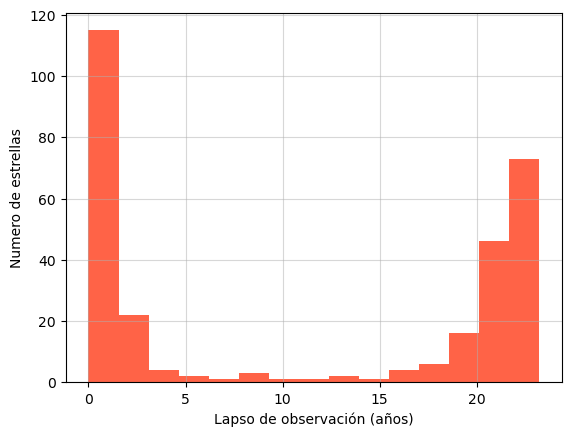

In [275]:
n = 15
plt.figure()    
plt.hist(timespans,color = "tomato",bins = n)
plt.xlabel('Lapso de observación (años)')
plt.ylabel('Numero de estrellas')
plt.grid(alpha = 0.5)
plt.savefig("timespans.png", transparent = True)